In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Cardiotocographic.csv")

In [3]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


## *1. Data Preprocessing*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
col = data.select_dtypes(include =['number']).columns
#col.isnull() doesn't work since this is only a container for all column names rathar than data itself!

In [6]:
type(col)
#using col(pandas index) to parse through actual dataframe!
for i in col:
    count = data[i].isnull().sum()
    print(i,count)

LB 21
AC 20
FM 0
UC 0
DL 0
DS 21
DP 21
ASTV 0
MSTV 0
ALTV 0
MLTV 21
Width 21
Tendency 21
NSP 21


In [7]:
df1 = pd.DataFrame() #assigning a new dataframe all the data from og data frame(data) to perform isnull
for i in col:
    df1[i] = data[i]
df1

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [8]:
df1.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [9]:
data.isnull().sum() #can also be done on the dataset directly 😭.

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [10]:
data.mean()

LB          133.343598
AC            0.003219
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000003
DP            0.000175
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64

In [11]:
#data.fillna(data.mean()) does not work since it returns new dataframe, best way to make it work is to assign it to new variable or the same one
data = data.fillna(data.mean())

In [12]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [13]:
for i in col:
    print(f'\nchecking outliers in',i)
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = (q3-q1)
    print('first quartile:',q1)
    print('third quartile:',q3)
    print('IQR:',iqr)
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    print('lower bound:',lower_bound)
    print('upper bound:',upper_bound)
    #outliers = [(data[i]<lower_bound) | (data[i]>upper_bound)]
    outliers=data.loc[(data[i]<lower_bound)|(data[i]>upper_bound),i]#using .loc[condition(rows), coulmn] to filter
    print(outliers)
    print(outliers.shape[0],' outliers found')
    print('-----------------------------------------------------------------------------------------------------------')


checking outliers in LB
first quartile: 126.0
third quartile: 140.0
IQR: 14.0
lower bound: 105.0
upper bound: 161.0
134      52.000000
411     214.000000
610     214.000000
612     214.000000
785      52.000000
1027     51.842487
1103    214.000000
1406    214.000000
1504    214.000000
1834     52.188547
Name: LB, dtype: float64
10  outliers found
-----------------------------------------------------------------------------------------------------------

checking outliers in AC
first quartile: 0.0
third quartile: 0.0056061275
IQR: 0.0056061275
lower bound: -0.00840919125
upper bound: 0.01401531875
8       0.038567
23     -0.019284
83      0.014706
85      0.014230
116     0.038567
157    -0.019284
181     0.017241
496     0.014178
497     0.015552
498     0.015258
500     0.014178
501     0.014726
526     0.015013
527     0.014065
529     0.019284
530     0.015590
531     0.016423
552     0.015782
616     0.014806
626     0.038567
630     0.017391
681    -0.019284
999     0.014024
100

no inconsistencies found, null values replaced with mean values 

## *Central tendencies and Dispersion* 


In [14]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [15]:
data.var()

LB          1.257612e+02
AC          1.909743e-05
FM          4.561608e-03
UC          1.115869e-05
DL          1.117352e-05
DS          1.983432e-08
DP          6.982467e-07
ASTV        3.539656e+02
MSTV        1.377412e+00
ALTV        4.496538e+02
MLTV        5.982026e+01
Width       1.824927e+03
Tendency    4.127083e-01
NSP         4.114275e-01
dtype: float64

In [16]:
data.median()

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [17]:
data.mode(axis = 0)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.5,0.0,0.0,39.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN


## *Visualizations*

####  Create histograms or boxplots to visualize the distributions of various numerical variables. ● Use bar charts or pie charts to display the frequency of categories for categorical variables. ● Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables. ● Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

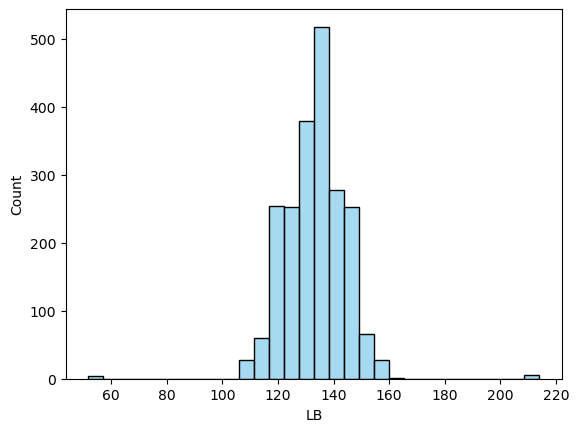

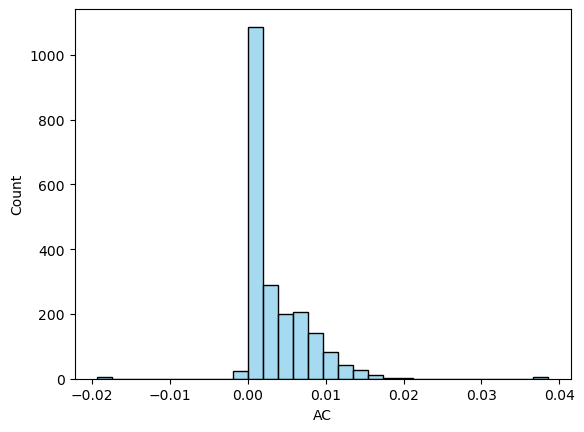

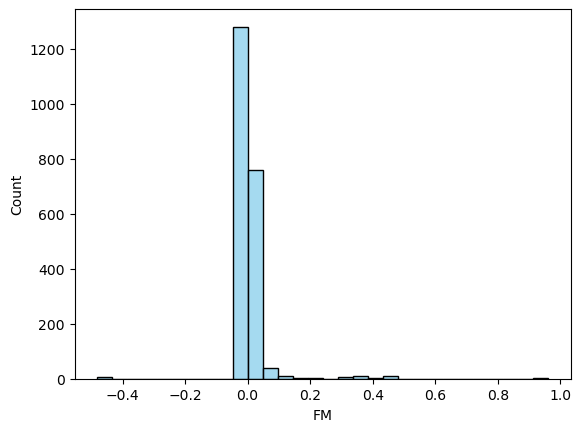

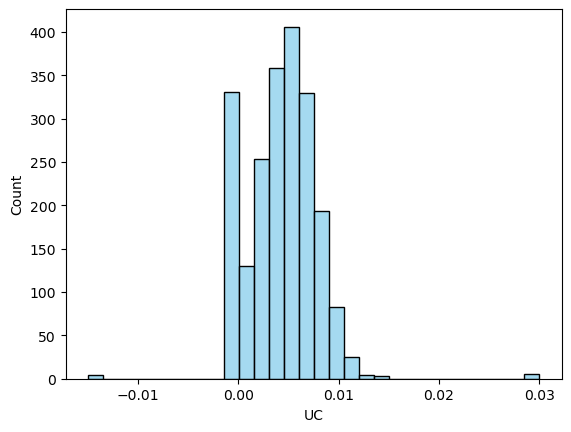

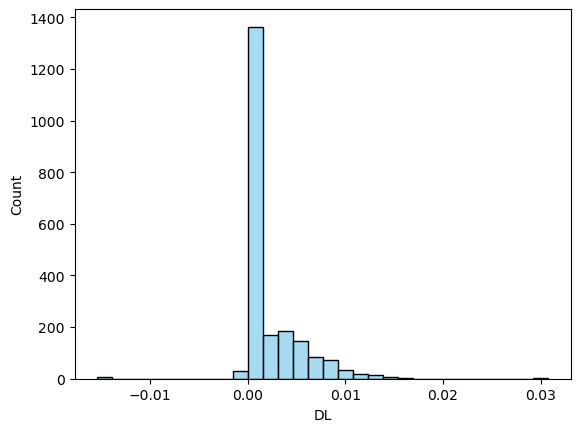

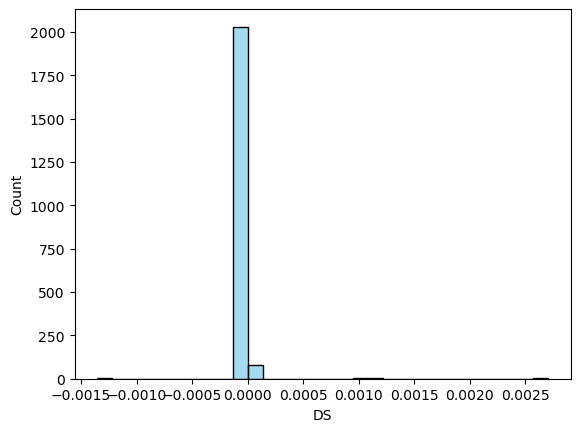

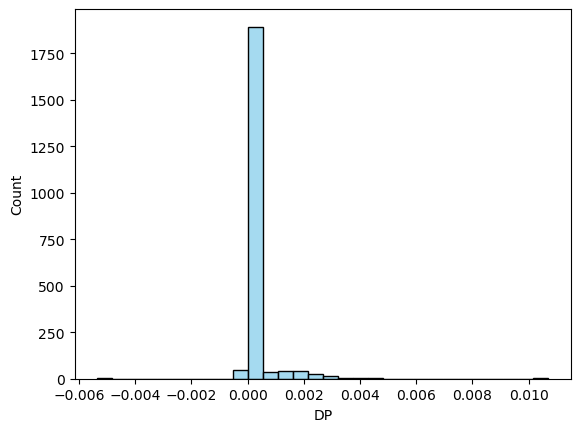

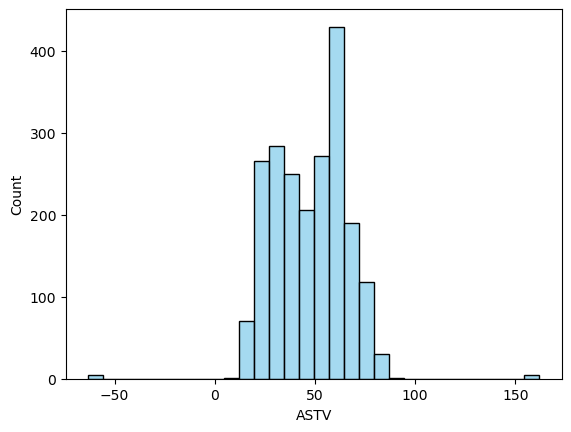

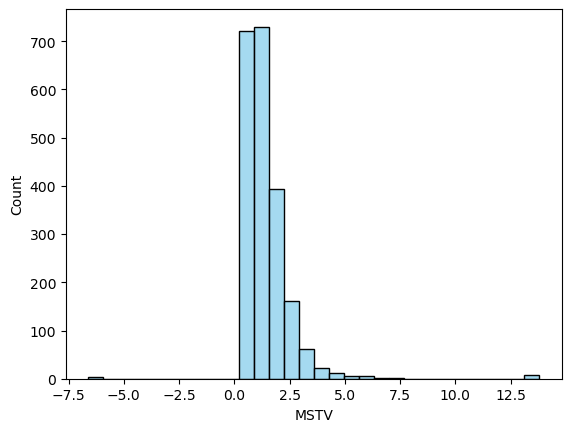

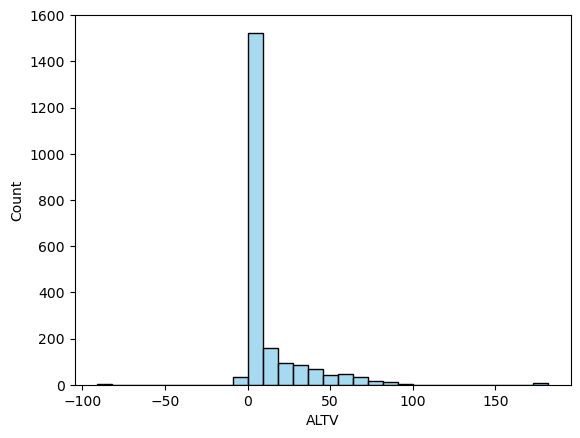

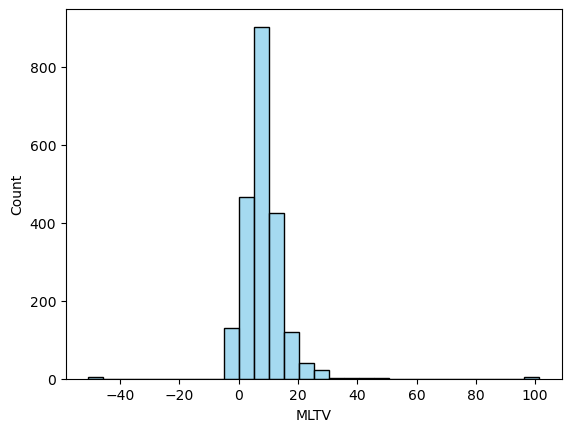

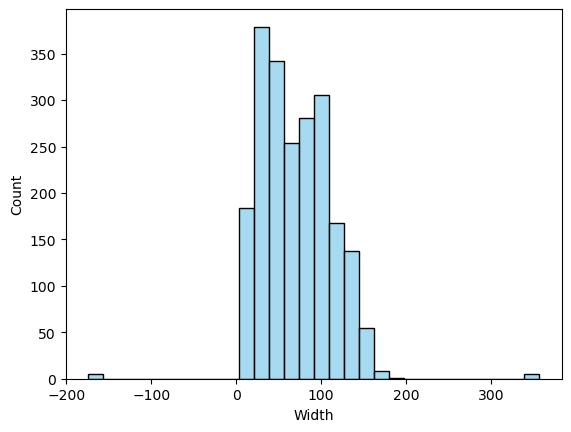

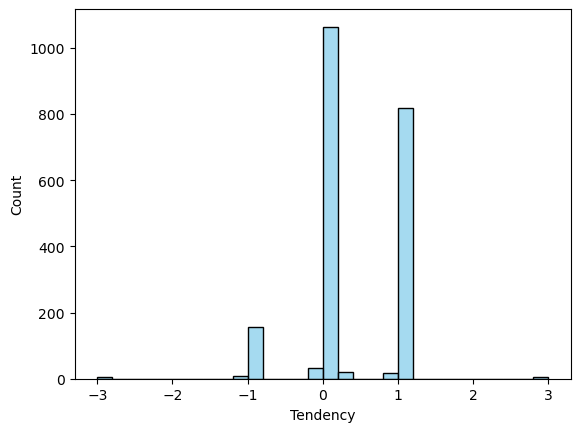

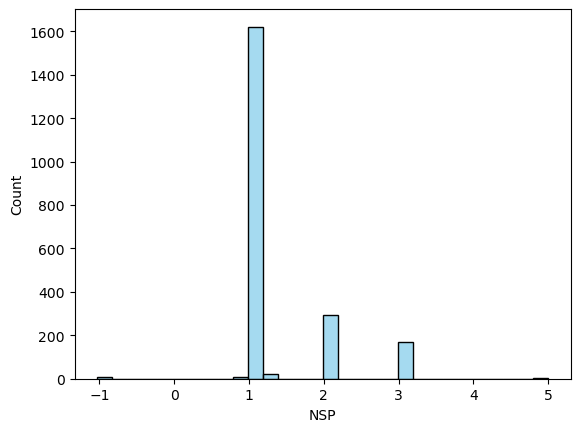

In [18]:
#no categorical data present
#box plots and histograms
for i in col:
    sns.histplot(data[i] ,bins = 30, color = 'skyblue')
    plt.show()

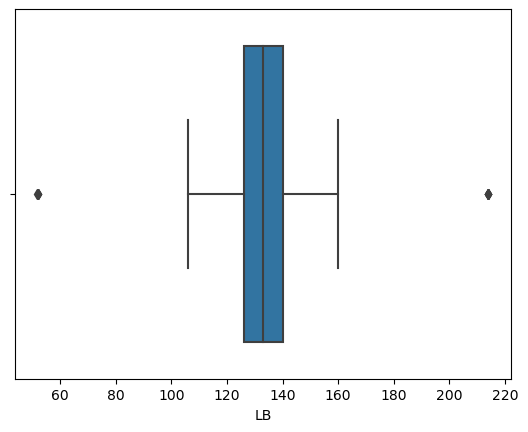

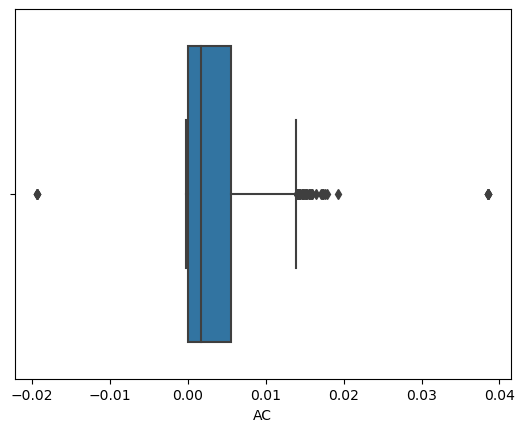

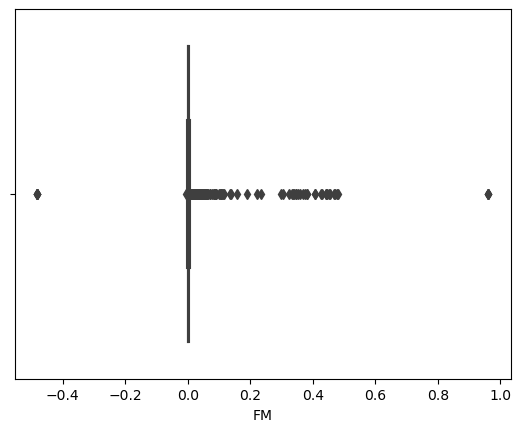

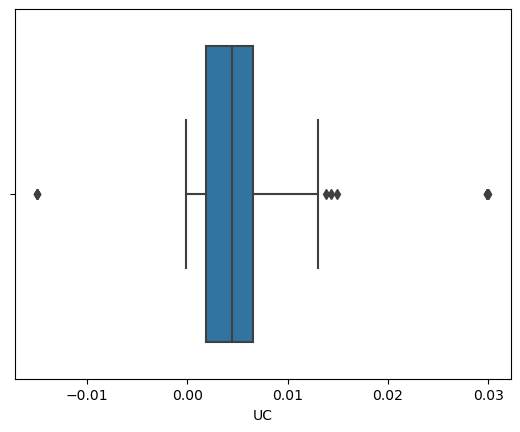

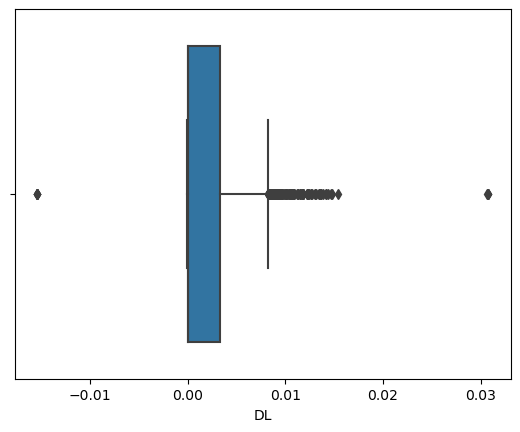

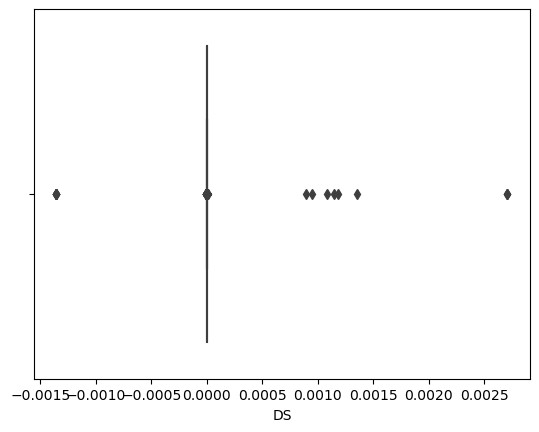

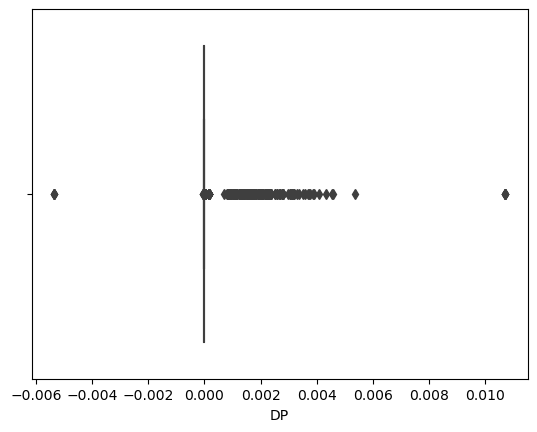

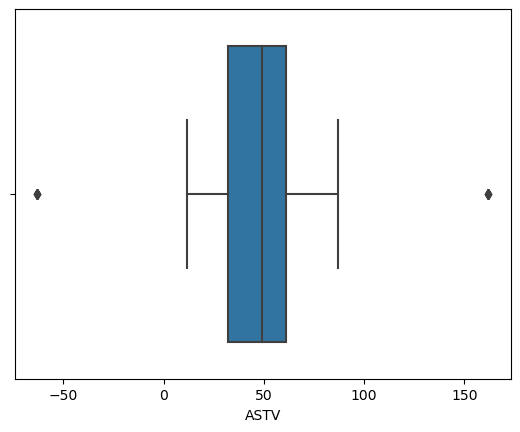

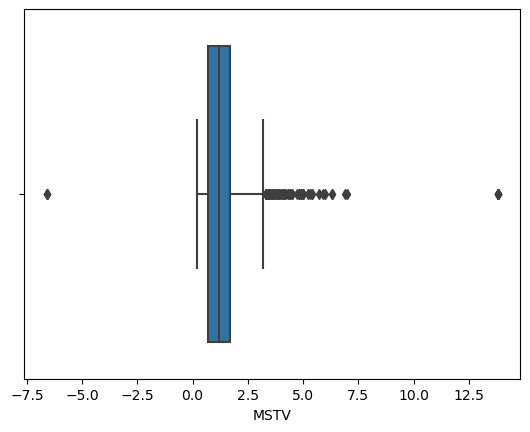

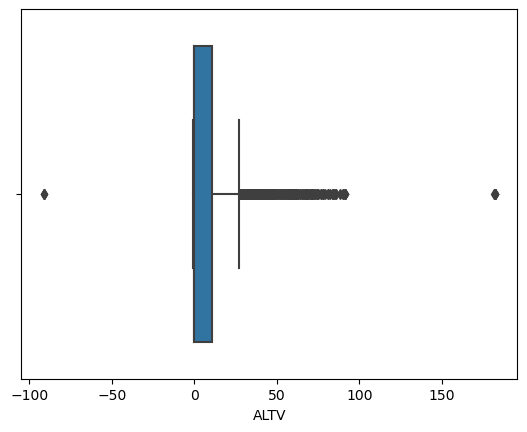

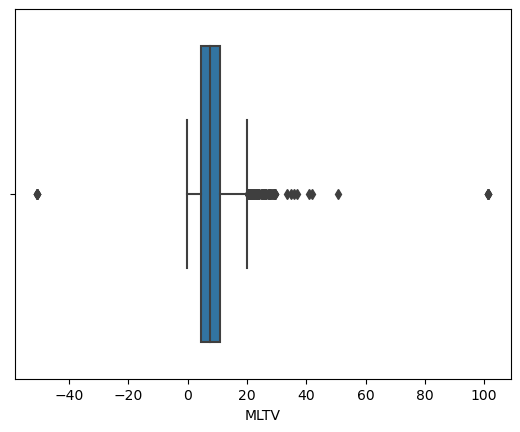

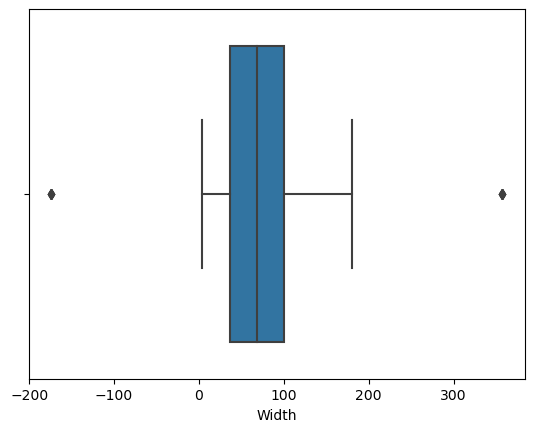

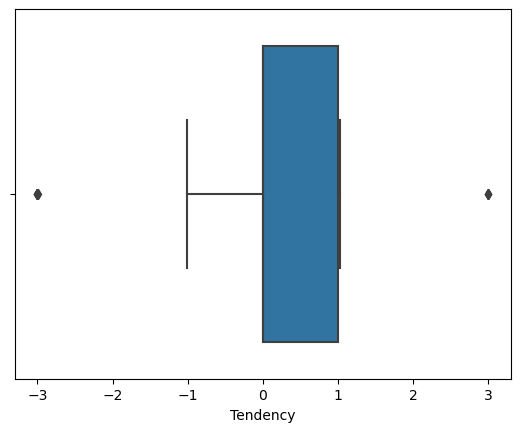

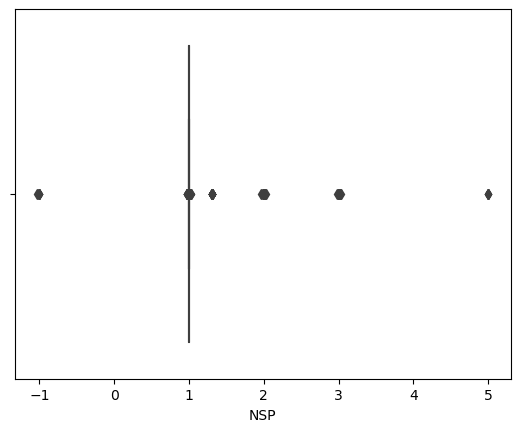

In [19]:

for i in col:
    plt.figure() 
    sns.boxplot(x=data[i])#color = 'skyblue')
    plt.show()

## *Correlation,Cor Matrix,Heatmaps and Scatterplots*

In [21]:
data.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357


### *Heatmap*

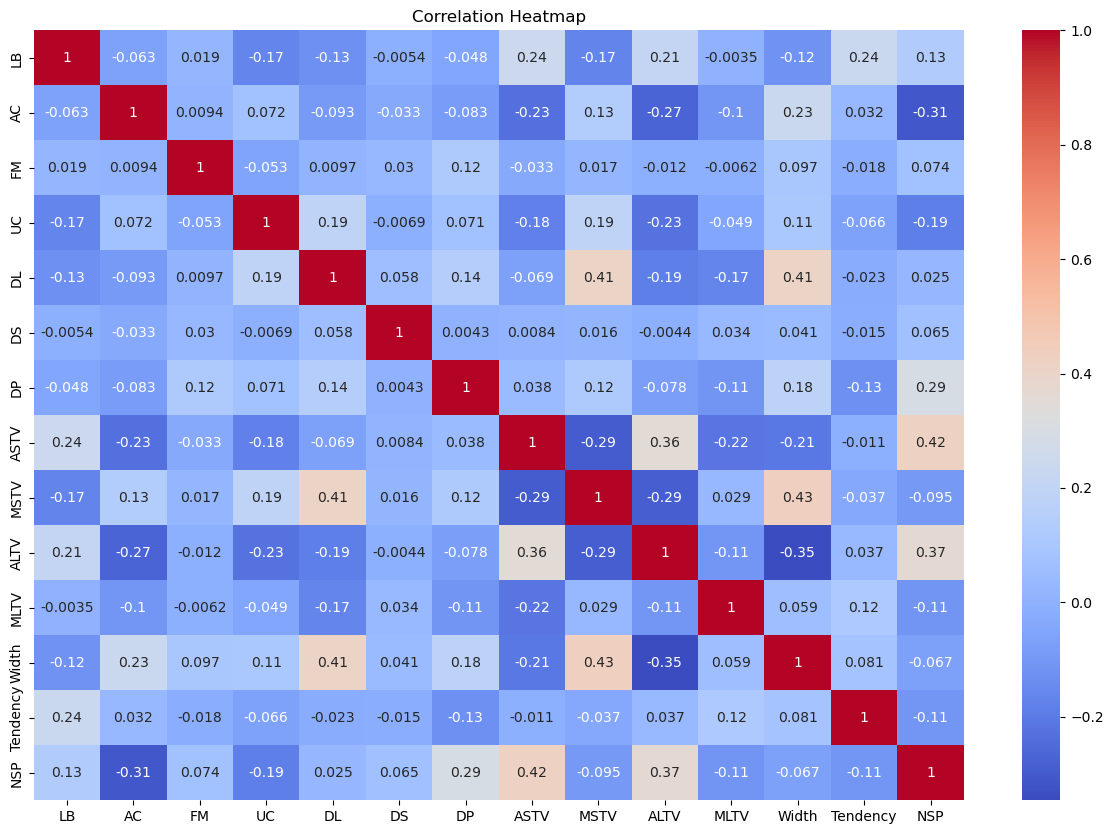

In [26]:
plt.figure(figsize=(15,10))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### *Pairplots*

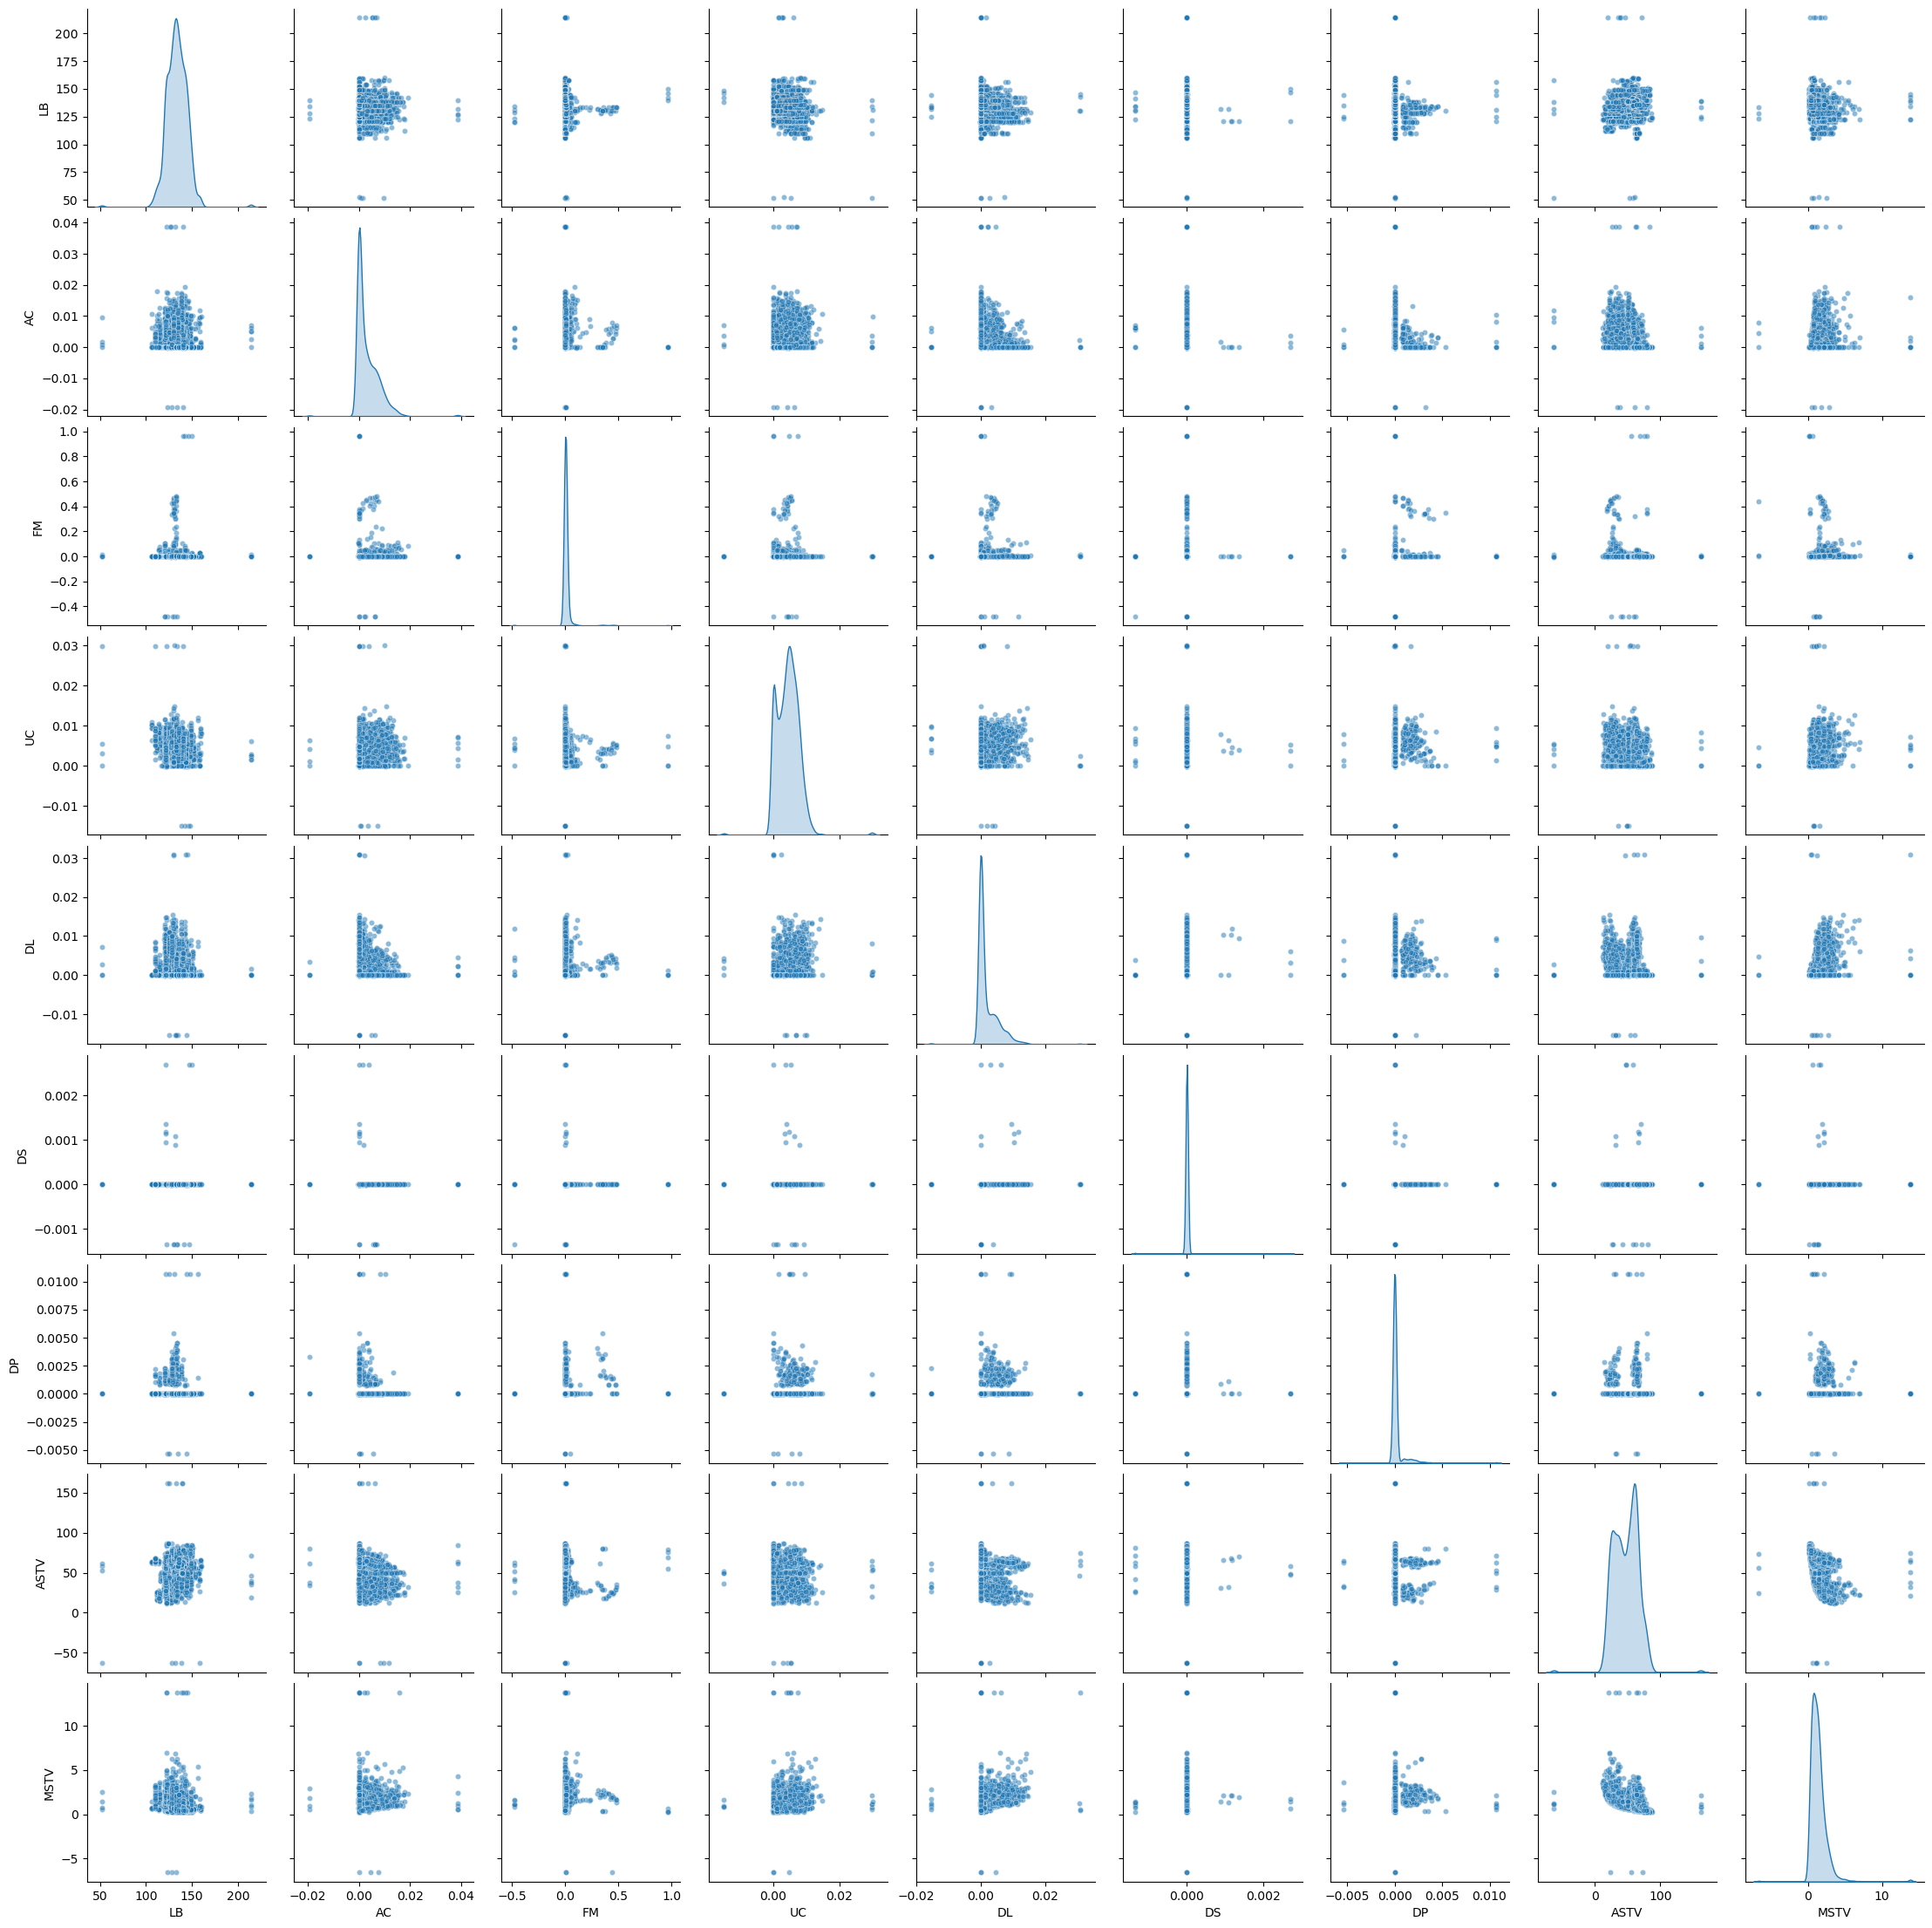

In [39]:
#seaborn function for scatterplot grid
sns.pairplot(df1.iloc[:,0:9], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})  
plt.show()

*No trends or patterns because there are no time intervals !!*

In [40]:
correlation_matrix = data.corr()

# Find correlations greater than 0.4 or less than -0.4
high_correlations = correlation_matrix[((correlation_matrix > 0.4) | (correlation_matrix < -0.4)) & (correlation_matrix !=1.0)]

print("Correlations greater than 0.4 or less than -0.4:")
high_correlations

Correlations greater than 0.4 or less than -0.4:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.410102,NaN,NaN,0.408664,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421313
MSTV,NaN,NaN,NaN,NaN,0.410102,NaN,NaN,NaN,NaN,NaN,NaN,0.433064,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#only few inter-attribute high correlation cases observed!

###                                                        EOF